<a href="https://colab.research.google.com/github/jrhtdo/JINA-H/blob/main/JINA_H.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/jrhtdo/JINA-H/blob/main/Helix%20Logo-min.png?raw=true" height="200" align="right" style="height:240px">

The **Joint Interactive Nucleotide Analysis-Helix** (Tool)  was developed at Helix Biogen Institute and is designed to calculate sequence lenght, GC content, start codon and stop codon, protein translation of DNA and RNA sequences and predict the 3D model of the sequence. 

===Input should be single DNA sequences without the title or symbols.

Instruction

* Paste your sequence in the 'sequence' line.
* Click on 'connect' in the taskbar above.
* Click on 'Run all'.
* For just sequence property and translation, run the first cell only.


In [ ]:
#@title Sequence Property and Translation (DNA & RNA)
sequence = "ccgattgcgcagattcatattctggaaggccgcagcgatgaacagaaagaaaccctgatt cgcgaagtgagcgaagcgattagccgcagcctggatgcgccgctgaccagcgtgcgcgtg attattaccgaaatggcgaaaggccattttggcattggcggcgaactggcgagcaaa" #@param {type:"string"}
import re
from tabulate import tabulate
jobname = 'test' #@param {type:"string"}
x=sequence.upper().replace(' ','')
z=re.findall('...',x)
def leng(x):
    y=len(x)
    return y
def gcco(x):
    gc1=x.count('G')
    gc2=x.count('C')
    gcc=round((gc1+gc2)/leng(x),2)
    return gcc
def stacdn(x):
    sc=z.count('ATG')+z.count('AUG')
    return sc
def stpcdn(x):
    st=z.count('TAG')+z.count('TGA')+z.count('TAA')+z.count('UAG')+z.count('UGA')+z.count('UAA')
    return st
head= ['lenght', 'GC content', 'start codon', 'stop codon']
result=[leng(x),gcco(x),stacdn(x), stpcdn(x)]
value=[result]
print (tabulate(value, headers=head))

from google.colab import files
cds={'CGT':'R','CGC':'R','CGA':'R','CGG':'R','AGA':'R','AGG':'R','GGT':'G','GGC':'G','GGA':'G','GGG':'G','CCT':'P','CCC':'P','CCA':'P','CCG':'P','ATT':'I','ATC':'I','ATA':'I','ATG':'M','TTT':'F','TTC':'F','CTT':'L','CTC':'L','CTA':'L','CTG':'L','TTA':'L','TTG':'L','GTT':'V','GTC':'V','GTA':'V','GTG':'V','TGT':'C','TGC':'C','GCT':'A','GCC':'A','GCA':'A','GCG':'A','ACT':'T','ACC':'T','ACA':'T','ACG':'T','TCT':'S','TCC':'S','TCA':'S','TCG':'S','AGT':'S','AGC':'S','TAT':'Y','TAC':'Y','TGG':'W','CAA':'Q','CAG':'Q','AAT':'N','AAC':'N','CAT':'H','CAC':'H','GAA':'E','GAG':'E','GAT':'D','GAC':'D','AAA':'K','AAG':'K','TAA':'*','TAG':'*','TGA':'*','CGU':'R','GGU':'G','CCU':'P','AUU':'I','AUC':'I','AUA':'I','AUG':'M','UUU':'F','UUC':'F','CUU':'L','CUC':'L','CUA':'L','CUG':'L','UUA':'L','UUG':'L','GUU':'V','GUC':'V','GUA':'V','GUG':'V','UGU':'C','UGC':'C','GCU':'A','ACU':'T','UCU':'S','UCC':'S','UCA':'S','UCG':'S','AGU':'S','UAU':'Y','UAC':'Y','UGG':'W','AAU':'N','CAU':'H','GAU':'D','UAA':'*','UAG':'*','UGA':'*'}
x=sequence.upper().replace(' ','')
y=re.findall('...',x)
z=[]
for i in y:
	if i in cds:
		z.append(cds.get(i))
w=','.join(z)
result=w.replace(',','').replace('*','')
print(result)
with open(f"{jobname} translation.txt", "w") as text_file:
  text_file.write(result) 
files.download(f"{jobname} translation.txt")


  lenght    GC content    start codon    stop codon
--------  ------------  -------------  ------------
     177          0.55              1             0
PIAQIHILEGRSDEQKETLIREVSEAISRSLDAPLTSVRVIITEMAKGHFGIGGELASK


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#@title Install dependencies
%%bash -s $use_amber $use_templates

set -e

USE_AMBER=$1
USE_TEMPLATES=$2

if [ ! -f COLABFOLD_READY ]; then
  # install dependencies
  # We have to use "--no-warn-conflicts" because colab already has a lot preinstalled with requirements different to ours
  pip install -q --no-warn-conflicts "colabfold[alphafold-minus-jax] @ git+https://github.com/sokrypton/ColabFold"
  # high risk high gain
  pip install -q "jax[cuda11_cudnn805]>=0.3.8,<0.4" -f https://storage.googleapis.com/jax-releases/jax_releases.html
  touch COLABFOLD_READY
fi


2022-11-18 10:06:10,488 Found 5 citations for tools or databases
2022-11-18 10:06:16,457 Query 1/1: test_3faf5 (length 59)


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:00 remaining: 00:00]


2022-11-18 10:06:17,552 Running model_1
2022-11-18 10:07:12,159 model_1 took 50.8s (3 recycles) with pLDDT 95.5 and ptmscore 0.752


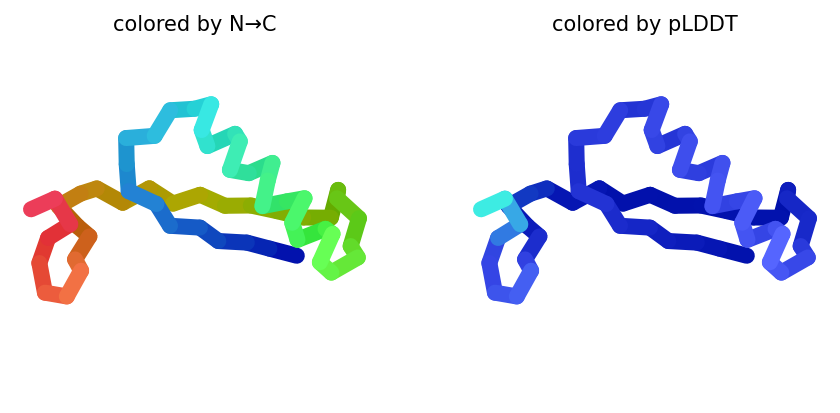

2022-11-18 10:07:22,284 Running model_2
2022-11-18 10:07:39,628 model_2 took 15.2s (3 recycles) with pLDDT 96.4 and ptmscore 0.764


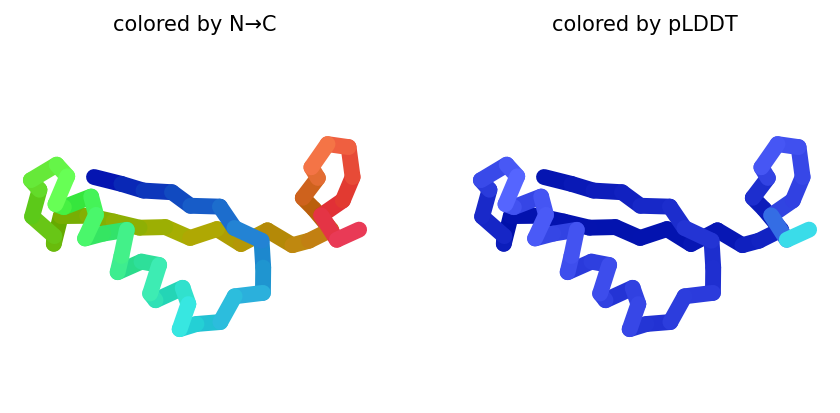

2022-11-18 10:07:41,100 Running model_3
2022-11-18 10:07:58,159 model_3 took 15.1s (3 recycles) with pLDDT 97.4 and ptmscore 0.782


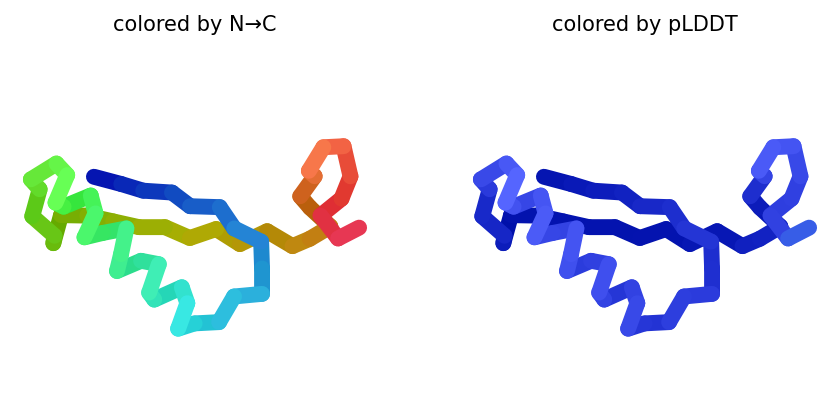

2022-11-18 10:07:59,599 Running model_4
2022-11-18 10:08:16,676 model_4 took 15.2s (3 recycles) with pLDDT 96.8 and ptmscore 0.775


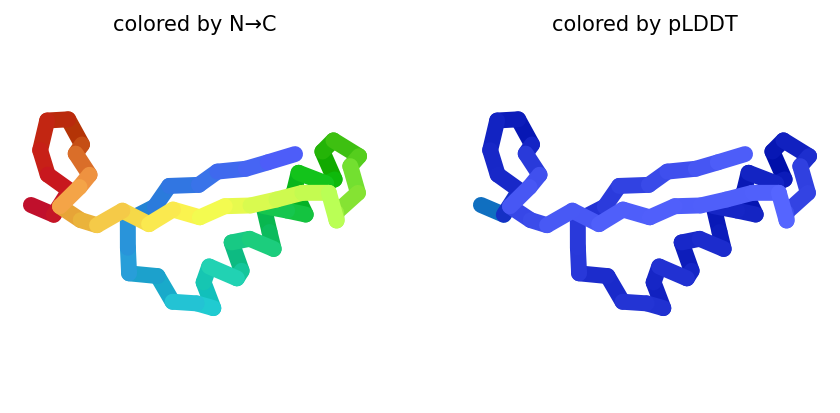

2022-11-18 10:08:18,118 Running model_5
2022-11-18 10:08:35,532 model_5 took 15.4s (3 recycles) with pLDDT 96.2 and ptmscore 0.776


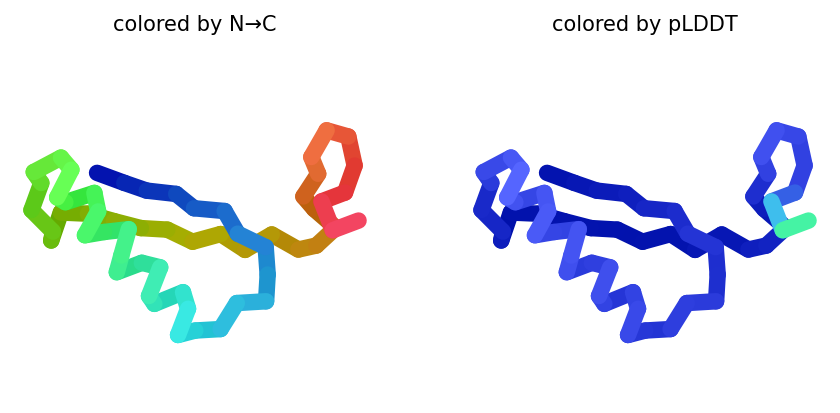

2022-11-18 10:08:37,002 reranking models by plddt
2022-11-18 10:08:38,739 Done
  adding: config.json (deflated 50%)
  adding: test_3faf5_predicted_aligned_error_v1.json (deflated 89%)
  adding: test_3faf5_unrelaxed_rank_1_model_3_scores.json (deflated 72%)
  adding: test_3faf5_unrelaxed_rank_2_model_4_scores.json (deflated 72%)
  adding: test_3faf5_unrelaxed_rank_3_model_2_scores.json (deflated 72%)
  adding: test_3faf5_unrelaxed_rank_4_model_5_scores.json (deflated 72%)
  adding: test_3faf5_unrelaxed_rank_5_model_1_scores.json (deflated 71%)
  adding: test_3faf5.a3m (deflated 60%)
  adding: test_3faf5.single_sequence.a3m (deflated 8%)
  adding: test_3faf5_unrelaxed_rank_1_model_3.pdb (deflated 78%)
  adding: test_3faf5_unrelaxed_rank_2_model_4.pdb (deflated 78%)
  adding: test_3faf5_unrelaxed_rank_3_model_2.pdb (deflated 78%)
  adding: test_3faf5_unrelaxed_rank_4_model_5.pdb (deflated 78%)
  adding: test_3faf5_unrelaxed_rank_5_model_1.pdb (deflated 78%)
  adding: cite.bibtex (deflated

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#@title Alpha fold 3D modelling
from google.colab import files
import os.path
import re
import hashlib
import random

def add_hash(x,y):
  return x+"_"+hashlib.sha1(y.encode()).hexdigest()[:5]

query_sequence = result 

# remove whitespaces
query_sequence = "".join(query_sequence.split())

jobname = 'test' #@param {type:"string"}
# remove whitespaces
basejobname = "".join(jobname.split())
basejobname = re.sub(r'\W+', '', basejobname)
jobname = add_hash(basejobname, query_sequence)
while os.path.isfile(f"{jobname}.csv"):
  jobname = add_hash(basejobname, ''.join(random.sample(query_sequence,len(query_sequence))))

with open(f"{jobname}.csv", "w") as text_file:
    text_file.write(f"id,sequence\n{jobname},{query_sequence}")

queries_path=f"{jobname}.csv"

custom_template_path = None
use_templates = False


msa_mode = "MMseqs2 (UniRef+Environmental)" 
pair_mode = "unpaired+paired" 


# decide which a3m to use
if msa_mode.startswith("MMseqs2"):
  a3m_file = f"{jobname}.a3m"

a3m_file = f"{jobname}.single_sequence.a3m"
with open(a3m_file, "w") as text_file:
  text_file.write(">1\n%s" % query_sequence)
#@markdown ### Advanced settings
model_type = "auto" #@param ["auto", "AlphaFold2-ptm", "AlphaFold2-multimer-v1", "AlphaFold2-multimer-v2"]
#@markdown - "auto" = protein structure prediction using "AlphaFold2-ptm" and complex prediction "AlphaFold-multimer-v2". For complexes "AlphaFold-multimer-v[1,2]" and "AlphaFold-ptm" can be used.
num_recycles = 3 #@param [1,3,6,12,24,48] {type:"raw"}
save_to_google_drive = False 

dpi = 200 #@param {type:"integer"}
#@markdown - set dpi for image resolution

#@markdown Don't forget to hit `Runtime` -> `Run all` after updating the form.



#@title Run Prediction
import sys
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from colabfold.download import download_alphafold_params, default_data_dir
from colabfold.utils import setup_logging
from colabfold.batch import get_queries, run, set_model_type
K80_chk = !nvidia-smi | grep "Tesla K80" | wc -l
if "1" in K80_chk:
  print("WARNING: found GPU Tesla K80: limited to total length < 1000")
  if "TF_FORCE_UNIFIED_MEMORY" in os.environ:
    del os.environ["TF_FORCE_UNIFIED_MEMORY"]
  if "XLA_PYTHON_CLIENT_MEM_FRACTION" in os.environ:
    del os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"]

from colabfold.colabfold import plot_protein
from pathlib import Path
import matplotlib.pyplot as plt


# For some reason we need that to get pdbfixer to import


def prediction_callback(unrelaxed_protein, length, prediction_result, input_features, type):
  fig = plot_protein(unrelaxed_protein, Ls=length, dpi=150)
  plt.show()
  plt.close()

result_dir="."
if 'logging_setup' not in globals():
    setup_logging(Path(".").joinpath("log.txt"))
    logging_setup = True

queries, is_complex = get_queries(queries_path)
model_type = set_model_type(is_complex, model_type)
download_alphafold_params(model_type, Path("."))
run(
    queries=queries,
    result_dir=result_dir,
    use_templates=use_templates,
    msa_mode=msa_mode,    
    model_type=model_type,
    num_models=5,
    num_recycles=num_recycles,
    model_order=[1, 2, 3, 4, 5],
    is_complex=is_complex,
    data_dir=Path("."),
    keep_existing_results=False,
    recompile_padding=1.0,
    rank_by="auto",
    pair_mode=pair_mode,
    stop_at_score=float(100),
    prediction_callback=prediction_callback,
    dpi=dpi
)
#@title Package and download results
#@markdown If you are having issues downloading the result archive, try disabling your adblocker and run this cell again. If that fails click on the little folder icon to the left, navigate to file: `jobname.result.zip`, right-click and select \"Download\" (see [screenshot](https://pbs.twimg.com/media/E6wRW2lWUAEOuoe?format=jpg&name=small)).


!zip -FSr $jobname".result.zip" config.json $jobname*".json" $jobname*".a3m" $jobname*"relaxed_rank_"*".pdb" "cite.bibtex" $jobname*".png"
files.download(f"{jobname}.result.zip")
